# 1. Import dependencies and data

In [1]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

  Using cached tensorflow-2.13.0-cp311-cp311-macosx_10_15_x86_64.whl (216.3 MB)
  Using cached matplotlib-3.7.2-cp311-cp311-macosx_10_12_x86_64.whl (7.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 18.8 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached ipywidgets-8.1.0-py3-none-any.whl (139 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.9.0-cp311-cp311-macosx_10_9_x86_64.whl (3.2 MB)
  Using cached libclang-16.0.6-py2.py3-none-macosx_10_9_x86_64.whl (24.5 MB)
  Using cached numpy-1.24.3-cp311-cp311-macosx_10_9_x86_64.whl (19.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 24.5 MB/s eta 0:00:00
  Using cached termcolor-2.3.0-py3-no

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt

Download data from tensorflow preexisting datasets, we will be using _"fashion_mnist"_

In [3]:
ds = tfds.load('fashion_mnist', split='train')

2023-08-29 11:28:10.383607: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /Users/tomasmonaco/tensorflow_datasets/fashion_mnist/3.0.1.incompleteX1OORQ/fashion_mnist-train.tfre…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /Users/tomasmonaco/tensorflow_datasets/fashion_mnist/3.0.1.incompleteX1OORQ/fashion_mnist-test.tfrec…

Dataset fashion_mnist downloaded and prepared to /Users/tomasmonaco/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
ds.as_numpy_iterator().next()['image']

2023-08-29 11:37:48.531340: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

# 2. Visualize data and build dataset

In [6]:
data_iterator = ds.as_numpy_iterator()

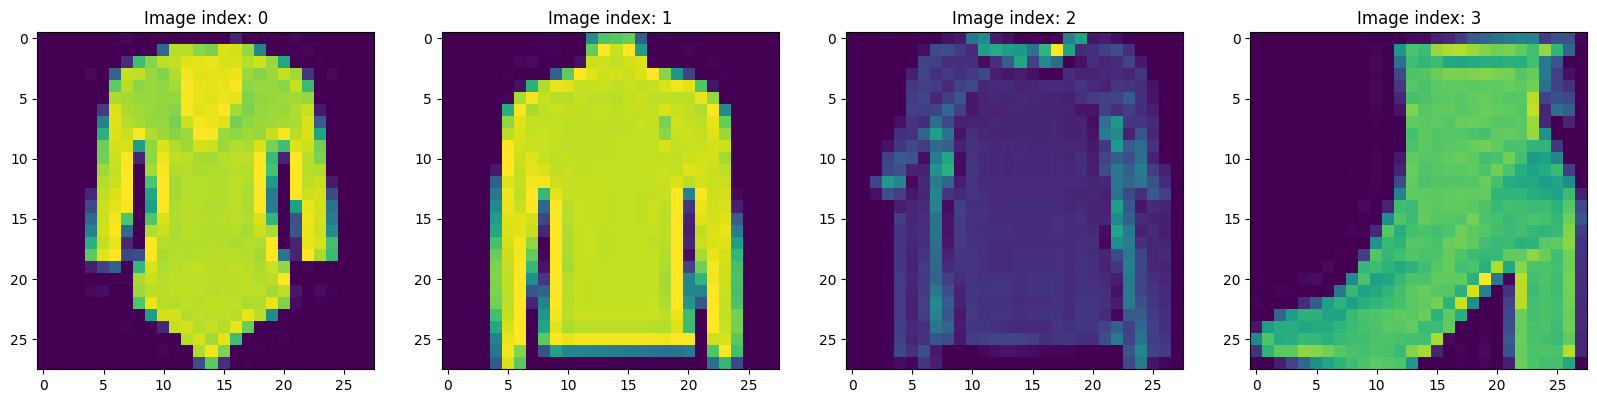

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample = data_iterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(f'Image index: {idx}')

In [11]:
# scale and return the image with a value betwwen 0 and 1
def scale_images(data):
    image = data['image']
    return image / 255

Apply Data pipeline

In [14]:
# MCSHBAP
dataset = tfds.load('fashion_mnist', split='train')
dataset = dataset.map(scale_images)
dataset = dataset.cache()
dataset = dataset.shuffle(60000)
dataset = dataset.batch(128)
dataset = dataset.prefetch(64)

# 3. Build Neural Network

### 3.1 Import modelling components

In [15]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D
from tensorflow.keras.models import Sequential

### 3.2 Build Generator

In [35]:
def build_generator():
    model = Sequential()
    
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    # Upsampling 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Reshaping into desire final output (28, 28, 1)
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model

In [156]:
generator = build_generator()
generator.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_63 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_13 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_17 (UpSampli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_64 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

Testing Generator:

1/1 [==============================] - 0s 157ms/step


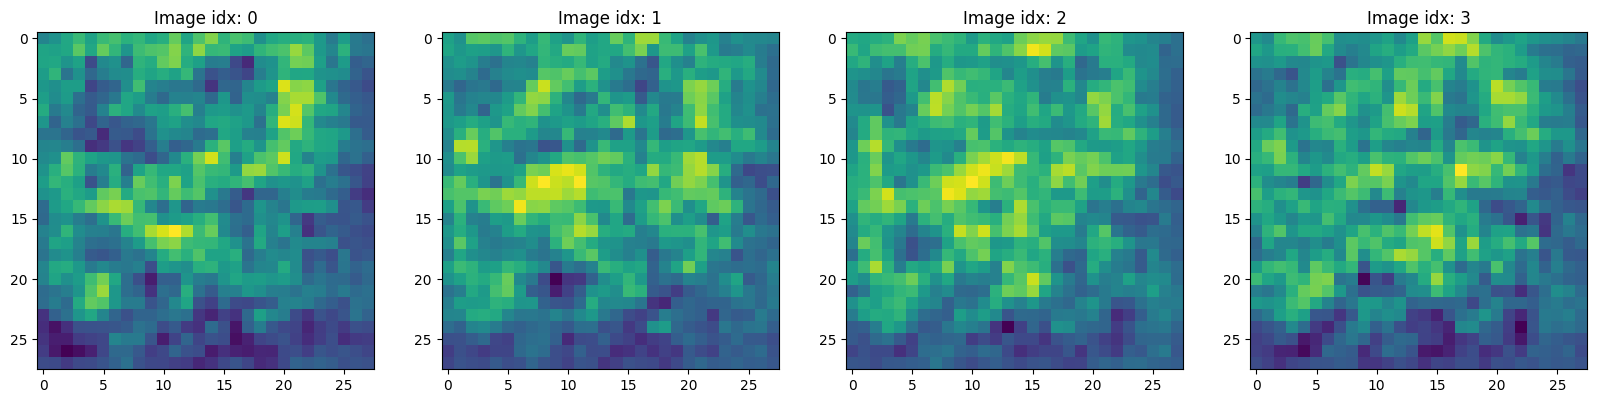

In [157]:
images = generator.predict(np.random.rand(4, 128, 1))

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, img in enumerate(images):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(f'Image idx: {idx}')

### 3.3 Build Discriminator

In [70]:
def build_discriminator():
    model = Sequential()
    
    # Conv block 1
    model.add(Conv2D(32, 5, input_shape=(28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Conv block 2
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Conv block 3
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Conv block 4
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [71]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_54 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_20 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_47 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_21 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_48 (Conv2D)          (None, 16, 16, 128)     

In [85]:
for idx, img in enumerate(images):
    print(f'Image idx: {idx}\nOriginality: {discriminator.predict(np.expand_dims(img, axis=0))}')

1/1 [==============================] - 0s 36ms/step
Image idx: 0
Originality: [[0.49226826]]
1/1 [==============================] - 0s 20ms/step
Image idx: 1
Originality: [[0.49223855]]
1/1 [==============================] - 0s 20ms/step
Image idx: 2
Originality: [[0.4922448]]
1/1 [==============================] - 0s 20ms/step
Image idx: 3
Originality: [[0.49232626]]


# 4. Construct trainning loop

### 4.1 Setup Losses and Optimizers

In [173]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [174]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

In [175]:
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

### 4.2 Build subclassed model

In [176]:
from tensorflow.keras.models import Model, load_model

In [177]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.generator = generator
        self.discriminator = discriminator
    
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
    
    def train_step(self, batch):
        # Get data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train Discriminator
        with tf.GradientTape() as d_tape:
            # Pass real and fake images into the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add noise to the outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate the Loss -> BinaryCrossentropy
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply Backpropagation - nn Learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train Generator
        with tf.GradientTape() as g_tape:
            # Generate new images
            gen_images = self.generator(tf.random.normal((128, 128, 1)), training=True)
            
            # Create predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
            
            # Calculate the loss - the model is rewarded for every real image it spots, so that is why we trick with zeros as the real ones.
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
        
        # Apply Backpropagation
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
            
        return {"total_d_loss":total_d_loss, "total_g_loss": total_g_loss}

In [178]:
fashgan = FashionGAN(generator, discriminator)

In [179]:
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### 4.3 Build callback

In [180]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [181]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

### 4.4 Train

In [182]:
# Is good to train with a larges epochs, ex. 2000/3000 in this case. (Not enough GPU for me :()
hist = fashgan.fit(dataset, epochs=1, callbacks=[ModelMonitor()])

  1/469 [..............................] - ETA: 1:43:07 - total_d_loss: 1.2247 - total_g_loss: 0.1688

KeyboardInterrupt: 

### 4.5 Review performance

In [117]:
# cannot review this model performance, shitty GPU 

# 5. Test the Generator

In [183]:
# loading weights to the generator due to the lack of GPU
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))

ValueError: axes don't match array

In [184]:
new_gen = load_model(os.path.join('archive', 'generatormodel.h5'))

In [186]:
new_images = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 195ms/step


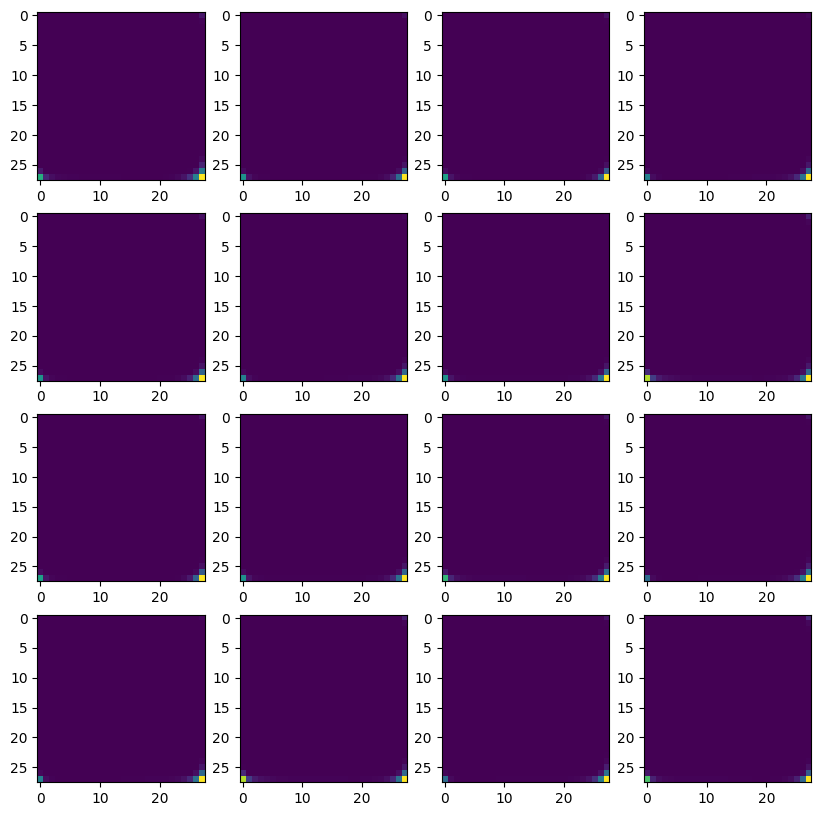

In [124]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))

for row in range(4):
    for col in range(4):
        ax[row][col].imshow(new_images[(row+1)*(col+1)-1])